In [92]:
from data_processing import *
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
import re, nltk
from sklearn.feature_extraction.text import *
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import pandas as pd

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [86]:
train_file = 'data/train.json'

train = pd.read_json(train_file)
train.head()
train.columns = ["Y", "id", "ingredients"]
#Then Extract the ingredients and convert them to a single list of recipes
#  called words_list

ingredients = train['ingredients']

words_list = [' '.join(x).strip() for x in ingredients if x not in list(text.ENGLISH_STOP_WORDS)]

vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = tokenize,
                             lowercase = True,
                             stop_words=REMOVE_WORDS,
                             max_features = 2000)
bag_of_words = vectorizer.fit(words_list)
train_ingredients = vectorizer.transform(words_list).toarray()
train_ingredients = pd.DataFrame(train_ingredients,
                                columns=vectorizer.get_feature_names())
train = pd.concat([train.Y, train_ingredients], axis=1)

### Cuisine counts from training data
This is an unbalanced class problem. However since accuracy is the main focus of the competition is accuracy, we will be using accuracy as a metric to select final model.

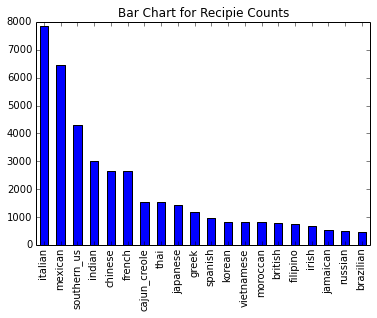

In [34]:
plt.figure()
train.Y.value_counts().plot(kind='bar', title="Bar Chart for Recipie Counts")

### Top ingredients in the training data
It shows some indredients that might be common across many different cuisines and should be removed from the list of ingredients.

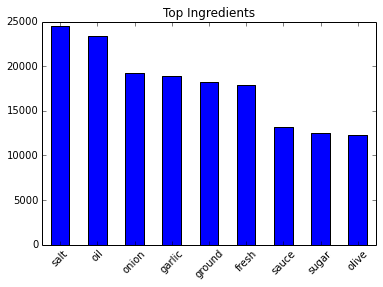

In [58]:
train_ingredients.sum().sort_values(ascending=False)[1:10].plot(kind='bar', rot = 45, 
                                                                title="Top Ingredients in Training Data")

### Top ingredients of by cuisines. 
This helps understand which if some ingredients are common in different cuisines.

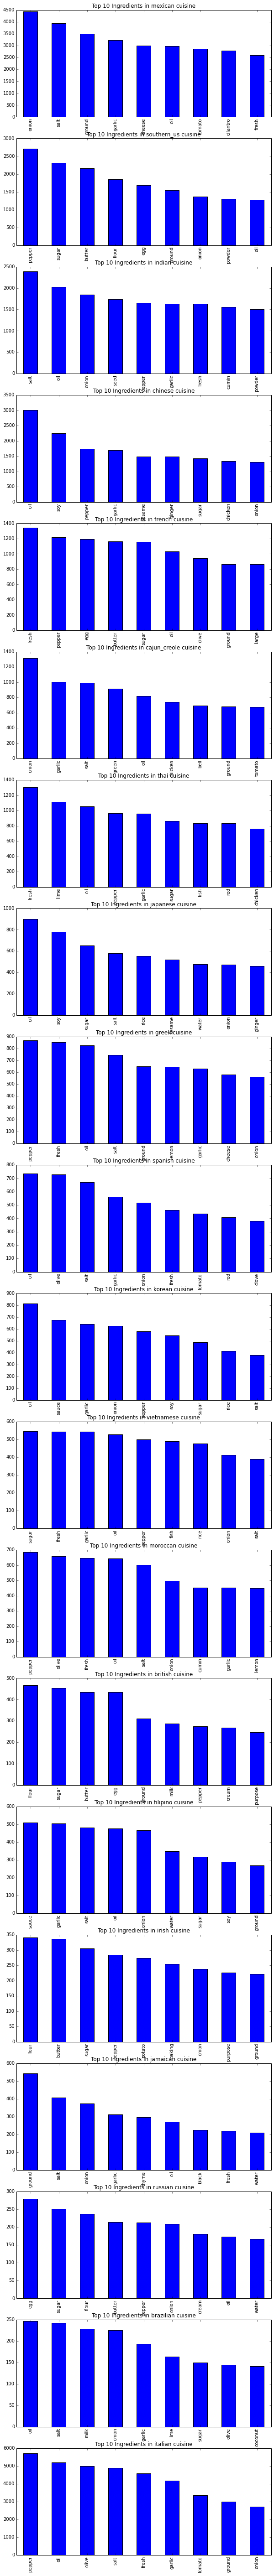

In [82]:
cuisine = list(train.Y.value_counts().index)

plt.figure(figsize=(10, 100))
for i, c in enumerate(cuisine):
    plt.subplot(20, 1, i)
    train.groupby("Y").sum().loc[c].sort_values(ascending=False)[1:10].plot(kind='bar', 
                                                                            title="Top 10 Ingredients in %s cuisine" %c)

### Using the visualizations above and looking at data, I decided to remove a lot of words that are not expected to add to the predicitve power of the model

In [96]:
REMOVE_WORDS += list(ENGLISH_STOP_WORDS)
words_list = [' '.join(x).strip() for x in ingredients if x not in REMOVE_WORDS]
words_list = [clean_data(x) for x in words_list]
vectorizer = CountVectorizer(analyzer = 'word',
                             tokenizer = tokenize,
                             lowercase = True,
                             stop_words=REMOVE_WORDS,
                             max_features = 2000)

bag_of_words = vectorizer.fit(words_list)
train_ingredients = vectorizer.transform(words_list).toarray()
train_ingredients = pd.DataFrame(train_ingredients,
                                columns=vectorizer.get_feature_names())
train = pd.concat([train.Y, train_ingredients], axis=1)

In [88]:
train.head()

,Y,abalone,abura,acai,achiote,acid,acinus,ackee,acorn,acting,...,yucca,yukon,yum,yuzu,yuzukosho,za,zesty,zinfandel,ziti,zucchini
0,greek,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,filipino,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Understand feature importance after finalizaing the best model, which happens to be XGB in this case. This is part of post analysis

In [99]:
clf_specs = {"kind":"XGB", "max_depth": 4,
             "learning_rate": 0.4, "n_estimators":400}
clf = XGBClassifier(max_depth=4,
                    learning_rate=0.4,
                    n_estimators=400)
train_Y = train.Y
train_X = train.drop(["Y"], axis=1)
clf = clf.fit(train_X, train_Y)
clf.feature_importances_

array([  0.00000000e+00,   0.00000000e+00,   1.12990703e-04, ...,
         9.68491731e-05,   9.68491731e-05,   1.95312500e-03], dtype=float32)

In [100]:
clf.feature_importances_

array([  0.00000000e+00,   0.00000000e+00,   1.12990703e-04, ...,
         9.68491731e-05,   9.68491731e-05,   1.95312500e-03], dtype=float32)